In [3]:
import pandas as pd
from sklearn.datasets import load_iris

In [4]:
df=pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [5]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [1]:
inputs=df.drop('salary_more_then_100k',axis=1)
inputs

NameError: name 'df' is not defined

In [7]:
target=df.filter(['salary_more_then_100k'],axis=1)
target

,salary_more_then_100k
0,0
1,0
2,1
3,1
4,0
5,1
6,0
7,0
8,0
9,1


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
inputs['company_n']=LabelEncoder().fit_transform(inputs['company'])
inputs['job_n']=LabelEncoder().fit_transform(inputs['job'])
inputs['degree_n']=LabelEncoder().fit_transform(inputs['degree'])

In [10]:
inputs_n=inputs.drop(['company','job','degree'],axis=1)
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [11]:
from sklearn import tree

In [12]:
model=tree.DecisionTreeClassifier(criterion='entropy')

In [22]:
model=model.fit(inputs_n,target)

In [23]:
print(model.predict([[2,1,0]]))
print(model.predict([[2,1,1]]))

[0]
[1]


c:\Users\Laxman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\Laxman\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


[Text(0.45454545454545453, 0.9166666666666666, 'X[0] <= 0.5\nentropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(0.2727272727272727, 0.75, 'X[1] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(0.18181818181818182, 0.5833333333333334, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.09090909090909091, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.2727272727272727, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.36363636363636365, 0.5833333333333334, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6363636363636364, 0.75, 'X[0] <= 1.5\nentropy = 0.811\nsamples = 12\nvalue = [3, 9]'),
 Text(0.5454545454545454, 0.5833333333333334, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.7272727272727273, 0.5833333333333334, 'X[1] <= 0.5\nentropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.6363636363636364, 0.4166666666666667, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.818181818181

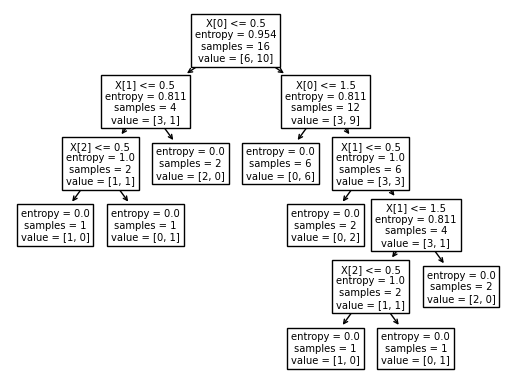

In [24]:
tree.plot_tree(model)